# 3D Plotting Examples

This notebook demonstrates the 3D plotting capabilities of the neural_analysis package.

## Features Covered:
- 3D scatter plots with color mapping
- 3D trajectory visualization
- Time-based coloring
- Both matplotlib and plotly backends

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from neural_analysis.plotting import (
    plot_scatter_3d,
    plot_trajectory_3d,
    PlotConfig,
    set_backend
)

# Set random seed for reproducibility
np.random.seed(42)

In [2]:
# Force reload modules to get latest changes
import importlib
import sys

# Reload neural_analysis modules
if 'neural_analysis.plotting.renderers' in sys.modules:
    importlib.reload(sys.modules['neural_analysis.plotting.renderers'])
if 'neural_analysis.plotting.grid_config' in sys.modules:
    importlib.reload(sys.modules['neural_analysis.plotting.grid_config'])
if 'neural_analysis.plotting.plots_3d' in sys.modules:
    importlib.reload(sys.modules['neural_analysis.plotting.plots_3d'])

In [3]:
# Reload the module to get latest changes
import sys
import importlib

# Remove cached modules
if 'neural_analysis.plotting.core' in sys.modules:
    del sys.modules['neural_analysis.plotting.core']
if 'neural_analysis.plotting.plots_3d' in sys.modules:
    del sys.modules['neural_analysis.plotting.plots_3d']
if 'neural_analysis.plotting' in sys.modules:
    del sys.modules['neural_analysis.plotting']

# Reimport
from neural_analysis.plotting import plot_scatter_3d, plot_trajectory_3d, PlotConfig, set_backend
print("PlotConfig fields:", [f for f in PlotConfig.__dataclass_fields__.keys()])

PlotConfig fields: ['title', 'xlabel', 'ylabel', 'zlabel', 'xlim', 'ylim', 'zlim', 'figsize', 'dpi', 'grid', 'legend', 'tight_layout', 'save_path', 'save_format', 'save_dir', 'plot_type', 'additional_save_title', 'save_html', 'show', 'cmap', 'alpha']


## 1. Basic 3D Scatter Plot

Create a simple 3D scatter plot with random data.

/mnt/c/Users/mauls/Documents/Code/neural-analysis/src/neural_analysis/plotting/renderers.py:181: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  return ax.scatter(


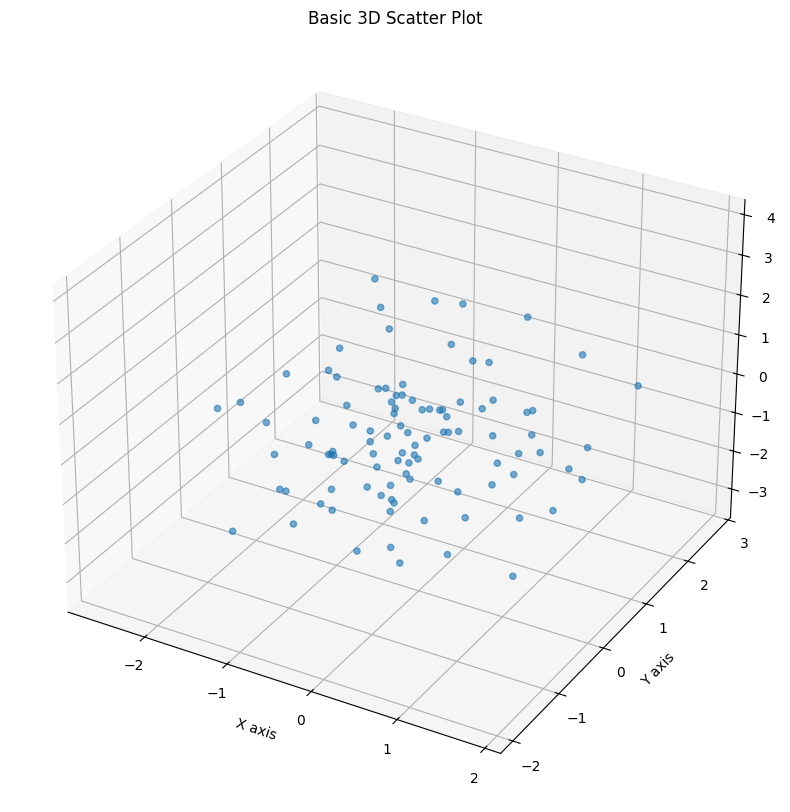

In [4]:
# Generate random 3D data
n_points = 100
x = np.random.randn(n_points)
y = np.random.randn(n_points)
z = np.random.randn(n_points)

# Create scatter plot
config = PlotConfig(
    title="Basic 3D Scatter Plot",
    xlabel="X axis",
    ylabel="Y axis",
    zlabel="Z axis",
    figsize=(10, 8)
)

plot_scatter_3d(x, y, z, config=config, backend='matplotlib')
plt.show()

## 2. 3D Scatter with Color Mapping

Use a fourth dimension to color the points.

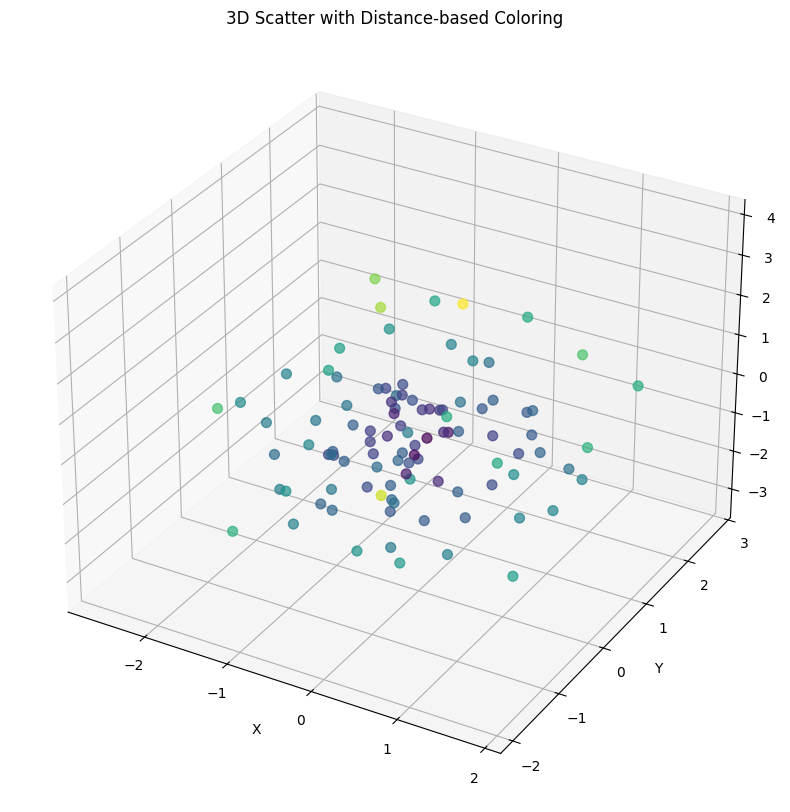

In [5]:
# Generate data with a color dimension
colors = np.sqrt(x**2 + y**2 + z**2)  # Distance from origin

config = PlotConfig(
    title="3D Scatter with Distance-based Coloring",
    xlabel="X",
    ylabel="Y",
    zlabel="Z",
    figsize=(10, 8)
)

plot_scatter_3d(
    x, y, z,
    colors=colors,
    cmap='viridis',
    sizes=50,
    alpha=0.7,
    config=config,
    backend='matplotlib'
)
plt.show()

## 3. 3D Trajectory - Helix

Visualize a 3D path (helix) through space.

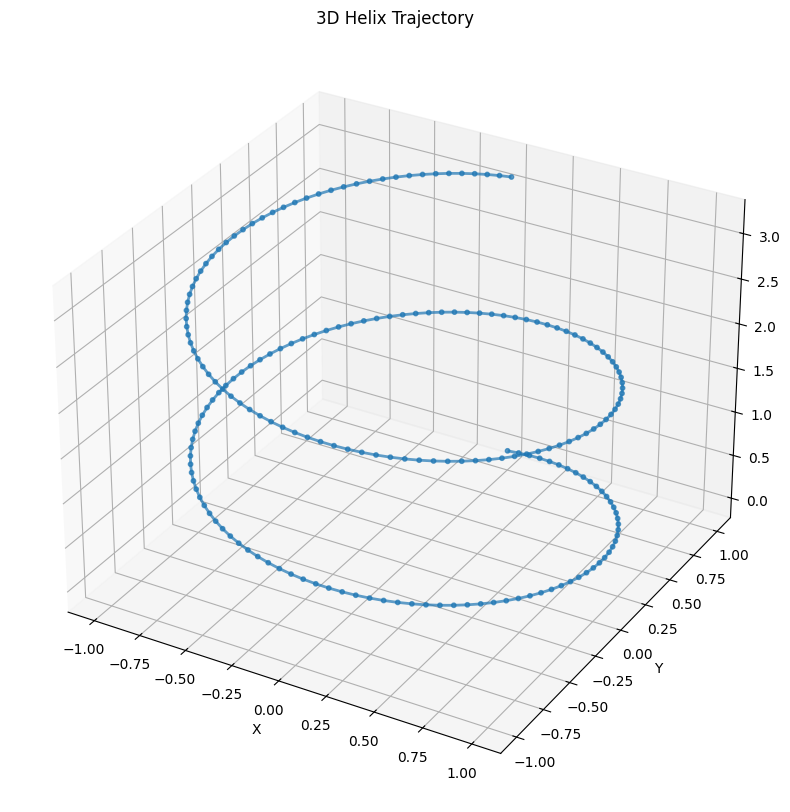

In [6]:
# Generate helix trajectory
t = np.linspace(0, 4*np.pi, 200)
x_helix = np.sin(t)
y_helix = np.cos(t)
z_helix = t / 4

config = PlotConfig(
    title="3D Helix Trajectory",
    xlabel="X",
    ylabel="Y",
    zlabel="Z (time)",
    figsize=(10, 8)
)

plot_trajectory_3d(
    x_helix, y_helix, z_helix,
    color_by=None,  # No time-based coloring
    linewidth=2,
    config=config,
    backend='matplotlib'
)
plt.show()

## 4. 3D Trajectory with Time-based Coloring

Color the trajectory based on time progression.

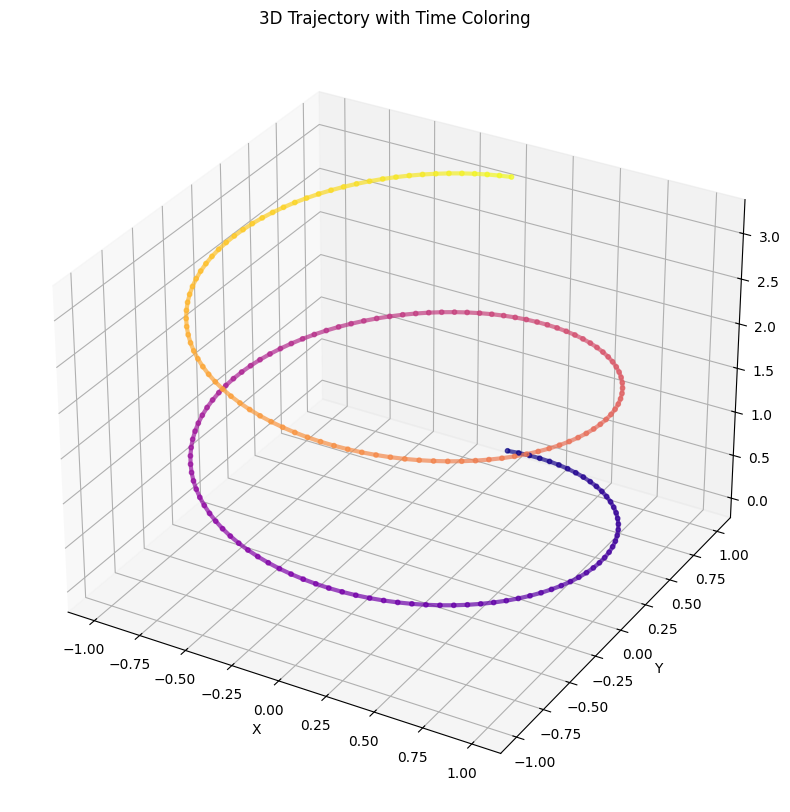

In [7]:
config = PlotConfig(
    title="3D Trajectory with Time Coloring",
    xlabel="X",
    ylabel="Y",
    zlabel="Z",
    figsize=(10, 8)
)

plot_trajectory_3d(
    x_helix, y_helix, z_helix,
    color_by="time",  # Color by time progression
    cmap='plasma',
    linewidth=3,
    show_points=True,
    config=config,
    backend='matplotlib'
)
plt.show()

## 5. Complex 3D Trajectory - Lissajous Curve

Visualize a complex 3D parametric curve.

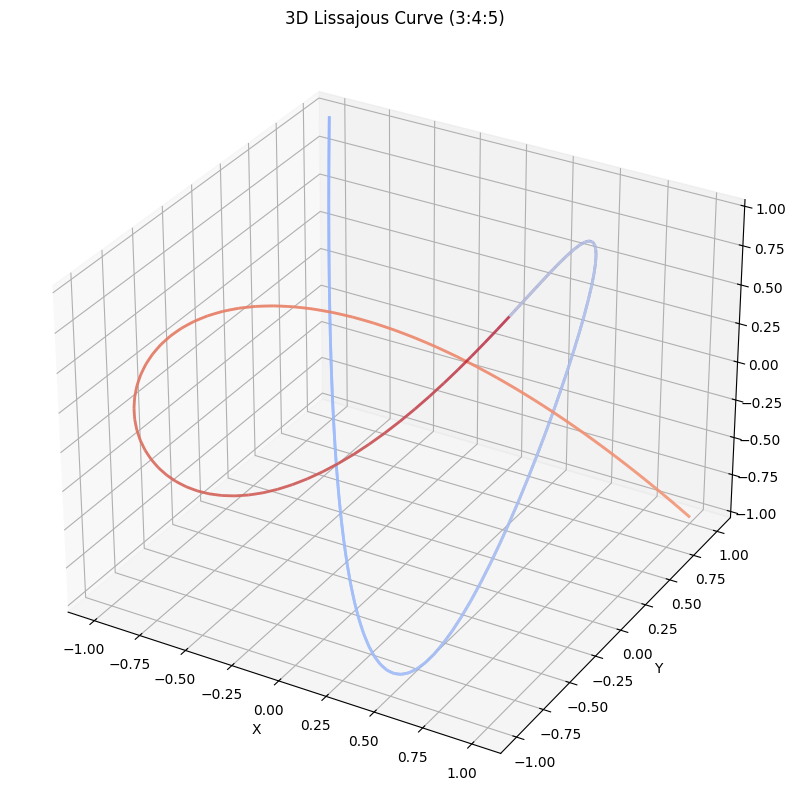

In [8]:
# Generate Lissajous curve
t = np.linspace(0, 2*np.pi, 300)
x_liss = np.sin(3*t)
y_liss = np.cos(4*t)
z_liss = np.sin(5*t)

config = PlotConfig(
    title="3D Lissajous Curve (3:4:5)",
    xlabel="X",
    ylabel="Y",
    zlabel="Z",
    figsize=(10, 8)
)

plot_trajectory_3d(
    x_liss, y_liss, z_liss,
    color_by="time",  # Fixed: was color_by_time
    cmap='coolwarm',
    linewidth=2,
    show_points=False,
    config=config,
    backend='matplotlib'
)
plt.show()

## 6. Neural State Space Example

Simulate neural population activity in 3D state space.

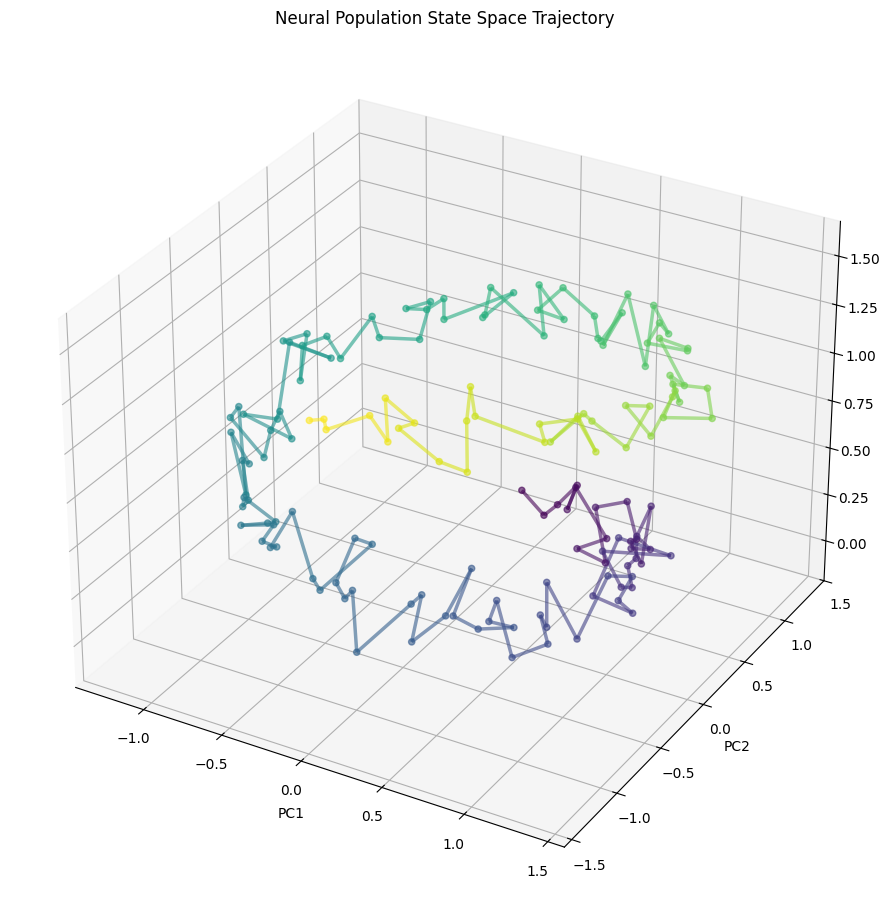

In [9]:
# Simulate neural trajectory with noise
n_timesteps = 150
t = np.linspace(0, 3*np.pi, n_timesteps)

# Base trajectory (circular motion with drift)
x_neural = np.sin(t) * (1 + 0.3*t/np.max(t))
y_neural = np.cos(t) * (1 + 0.3*t/np.max(t))
z_neural = 0.5 * t / np.pi

# Add noise
x_neural += np.random.randn(n_timesteps) * 0.1
y_neural += np.random.randn(n_timesteps) * 0.1
z_neural += np.random.randn(n_timesteps) * 0.1

config = PlotConfig(
    title="Neural Population State Space Trajectory",
    xlabel="PC1",
    ylabel="PC2",
    zlabel="PC3",
    figsize=(12, 9)
)

plot_trajectory_3d(
    x_neural, y_neural, z_neural,
    color_by="time",
    cmap='viridis',
    linewidth=2.5,
    show_points=True,
    point_size=20,
    alpha=0.6,
    config=config,
    backend='matplotlib'
)
plt.show()

## 7. Multiple Conditions Comparison

Compare different experimental conditions in 3D.

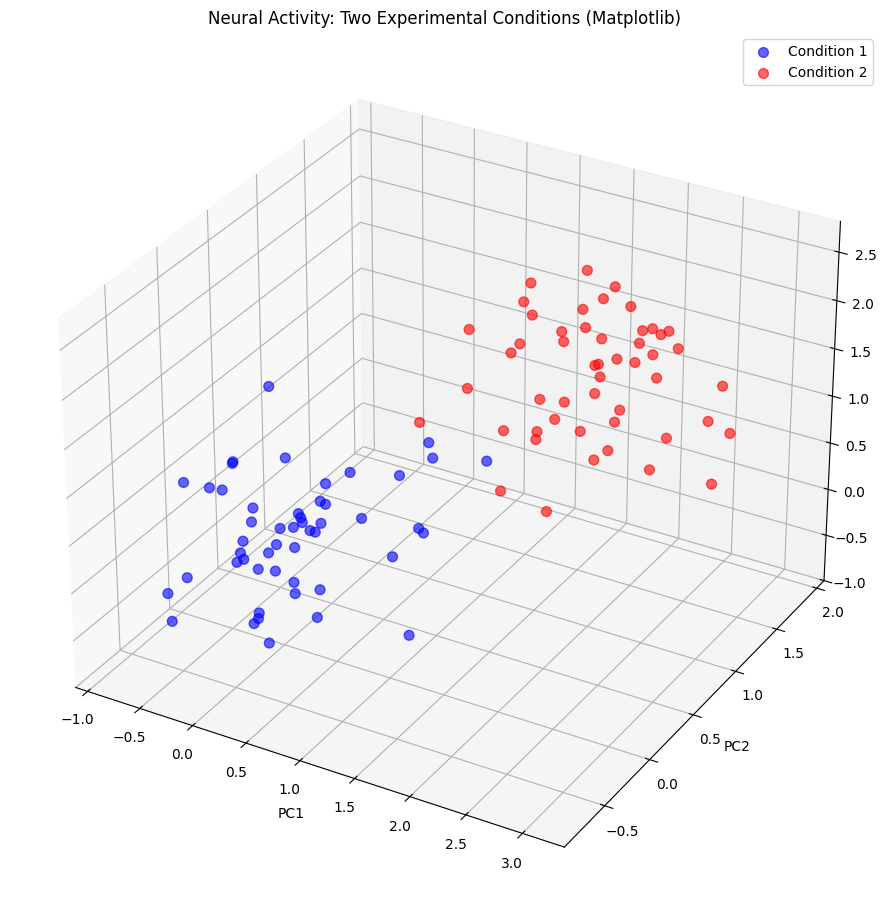

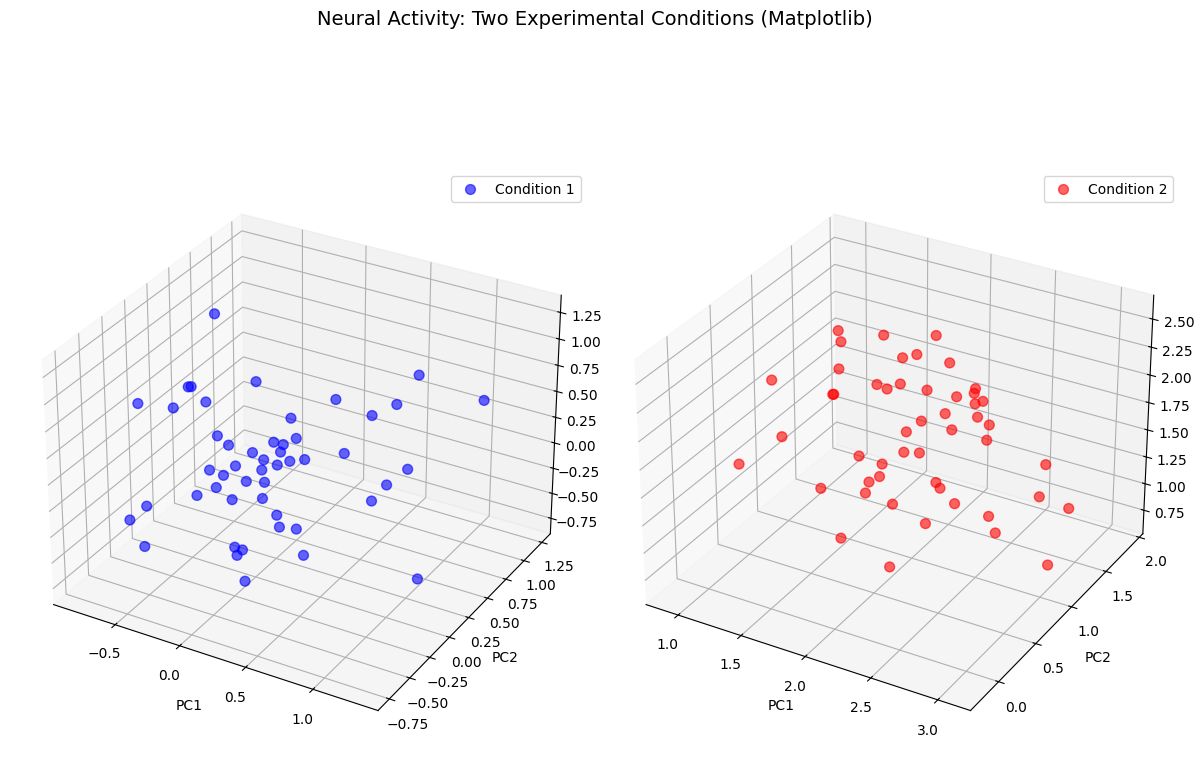

In [10]:
# Generate data for two conditions
n_trials = 50

# Condition 1: Clustered around origin
x1 = np.random.randn(n_trials) * 0.5
y1 = np.random.randn(n_trials) * 0.5
z1 = np.random.randn(n_trials) * 0.5

# Condition 2: Shifted cluster
x2 = np.random.randn(n_trials) * 0.5 + 2
y2 = np.random.randn(n_trials) * 0.5 + 1
z2 = np.random.randn(n_trials) * 0.5 + 1.5

# Plot 1: Matplotlib backend - both conditions overlaid in same 3D plot
from neural_analysis.plotting.grid_config import PlotGrid, PlotSpec

config = PlotConfig(
    title="Neural Activity: Two Experimental Conditions (Matplotlib)",
    xlabel="PC1",
    ylabel="PC2",
    zlabel="PC3",
    figsize=(12, 9)
)

specs = [
    PlotSpec(
        data=np.column_stack([x1, y1, z1]),
        plot_type='scatter3d',
        subplot_position=0,  # Same position = overlay
        color='blue',
        marker_size=50,
        alpha=0.6,
        label='Condition 1'
    ),
    PlotSpec(
        data=np.column_stack([x2, y2, z2]),
        plot_type='scatter3d',
        subplot_position=0,  # Same position = overlay
        color='red',
        marker_size=50,
        alpha=0.6,
        label='Condition 2'
    )
]

grid = PlotGrid(plot_specs=specs, config=config, backend='matplotlib')
ax = grid.plot()  # Single subplot returns just axes
plt.show()

config.figsize = (12, 9)
specs[0].subplot_position = 0
specs[1].subplot_position = 1

grid = PlotGrid(plot_specs=specs, config=config, backend='matplotlib')
fig, axes = grid.plot()
plt.show()

## 8. Plotly Interactive 3D Scatter

Use Plotly backend for interactive visualization.

In [11]:
# Generate clustered data
n_points = 200
theta = np.random.uniform(0, 2*np.pi, n_points)
phi = np.random.uniform(0, np.pi, n_points)
r = np.random.uniform(0.5, 2, n_points)

x_sphere = r * np.sin(phi) * np.cos(theta)
y_sphere = r * np.sin(phi) * np.sin(theta)
z_sphere = r * np.cos(phi)
colors_sphere = r  # Color by radius

config = PlotConfig(
    title="Interactive 3D Scatter (Plotly)",
    xlabel="X",
    ylabel="Y",
    zlabel="Z"
)

fig = plot_scatter_3d(
    x_sphere, y_sphere, z_sphere,
    colors=colors_sphere,
    cmap='turbo',
    sizes=5,
    alpha=0.7,
    config=config,
    backend='plotly'
)
fig.show()

## 9. Plotly Interactive 3D Trajectory

Interactive trajectory with time coloring.

In [12]:
# Create a spiral trajectory
t = np.linspace(0, 6*np.pi, 300)
radius = np.linspace(0.1, 2, 300)
x_spiral = radius * np.cos(t)
y_spiral = radius * np.sin(t)
z_spiral = t / (2*np.pi)

config = PlotConfig(
    title="Interactive 3D Spiral Trajectory (Plotly)",
    xlabel="X",
    ylabel="Y",
    zlabel="Z (time)"
)

fig = plot_trajectory_3d(
    x_spiral, y_spiral, z_spiral,
    color_by="time",
    cmap='rainbow',
    linewidth=3,
    show_points=True,
    config=config,
    backend='plotly'
)
fig.show()

## Summary

This notebook demonstrated:
- ✅ Basic 3D scatter plots
- ✅ Color mapping with colormaps
- ✅ 3D trajectories with time-based coloring
- ✅ Complex parametric curves (helix, Lissajous)
- ✅ Neural state space visualization
- ✅ Both matplotlib and plotly backends
- ✅ Interactive visualization with Plotly

All functions use the same consistent API and backend selection system!